# Análisis de Contaminantes Nuevo León

Ana Paula Ponce Dávila - A01620477
<br>
Andrés Olvera Varela - A01639918
<br>
Alejandro Hermosillo García - A01634552
<br>
Ernesto Godínez Medina - A01633812


## Librerías 

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7, 8.27)})
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import plot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objects as go


import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Funciones

In [ ]:
def missing(df, perc=0):
  missing_df=df.isnull().sum().reset_index()
  missing_df.columns=['column', 'missing count']
  missing_df['percentage']=(missing_df['missing count'])/df.shape[0]*100
  missing_df=missing_df[missing_df.percentage>perc]
  print('#columns containg missing values', len(missing_df))
  print('missing_columns=', list(missing_df.column))
  return missing_df.sort_values(by='percentage', ascending=False)

def filtro(df):
  df_fil=df[['parametro', 'Fecha', 'SO', 'CE', 'SE']]
  return df_fil

def over(col, lim):     
  cont = 0  #cont de las que se pasan
  cont_regular=0 #este contador es para la cantidad de registros que son regular
  cont_bueno=0
  lim_bueno=lim-lim*0.05
  for i in col:
    if lim < i:
      cont += 1
    if i<lim_bueno:
      cont_regular+=1
    if lim_bueno<=i<=lim:
      cont_bueno+=1
  return cont_regular, cont_bueno, cont 

def dur(l):
  anio = 2017
  print('-'*30)
  for i in l:
    print('Año', anio)
    print('Cantidad de días con mediciones:', i.shape[0])
    print('-'*30)
    anio+=1

def d_over(l, l_mx, l_oms): 
  anio = 2017
  print('-'*62)
  for j in l:
    print('Año:', anio)
    print('-'*10)
    print('Días sobre la normativa nacional en estación Suroeste:', over(j['SO'], l_mx))
    print('Días sobre la normativa nacional en estación Centro:', over(j['CE'], l_mx))
    print('Días sobre la normativa nacional en estación Sureste:', over(j['SE'], l_mx))
    print('-'*31)
    print('Días sobre la normativa de la OMS en estación Suroeste:', over(j['SO'], l_oms))
    print('Días sobre la normativa de la OMS en estación Centro:', over(j['CE'], l_oms))
    print('Días sobre la normativa de la OMS en estación Sureste:', over(j['SE'], l_oms))
    print('-'*62)
    anio+=1

def listsForBarGraph(contaminante,lista_categorias):  
  dias_en_anios=[365,365,365,366,365]
  regular=[]
  buenos=[]
  pasados=[]
  registros=dur_list(contaminante)
  faltantes = [e1 - e2 for e1, e2 in zip(dias_en_anios,registros)]
  for i in lista_categorias:
    regular.append(i[0])
    buenos.append(i[1])
    pasados.append(i[2])
  return regular, buenos, pasados,faltantes

def bar_plot_text(regulares,buenos,sobre,faltantes,estacion):
  anios=[2017,2018,2019,2020,2021]
  anios=4*anios
  estados=5*['Buenos']+5*['Regular']+5*['No Cumple']+5*['Faltante']
  datos=buenos+regular+pasado+faltantes
  print(len(anios),len(estados),len(datos))
  temp = {'Anio': anios,
        'Estado':estados,
        'Dato': datos}
  grafica = pd.DataFrame(temp)
  fig = px.bar(grafica, x='Anio', y='Dato', color="Estado", text_auto=True,title=estacion,
               color_discrete_map={
                "Regular": "#facf5a",
                "Buenos": "#49beb7",
                "No Cumple": "#ff5959",
                "Faltante": "#ffffff"}
             )
  fig.show()     

def d_over_list(l, limite,estacion):#vamos a hacer una funciónes tipo d_over & dur peor que regrese las listas en vez de imprimirlas
  over_list=[]
  for i in l:
    over_list.append(over(i[estacion],limite))
  return over_list

def dur_list(l):
  registros_list=[]
  for i in l:
    registros_list.append(i.shape[0])
  return registros_list

## Lectura de bases de datos

In [ ]:
cont = pd.ExcelFile('/content/drive/Shareddrives/Apostoles/Reto/BD_Tec_banderas_contaminantes.xlsx')
# Leemos las bases de datos de los contaminantes que nos interesan
missing_values = ["p", "c", "d", "b", "m", "l", "z", "o", "s", "r", "e", "a", "f", "h"]
pm10=pd.read_excel(cont,'PM10', na_values = missing_values)
pm25=pd.read_excel(cont,'PM2.5', na_values = missing_values)

## Estadística descriptiva 

In [ ]:
print('Tamaño de la base de PM 10:', pm10.shape)
print('Tamaño de la base de PM 2.5:', pm25.shape)

Tamaño de la base de PM 10: (39393, 28)
Tamaño de la base de PM 2.5: (39394, 28)


In [ ]:
pm10.head()

parametro               Fecha     SE SE b     NE NE b     CE CE b     NO  \
0      PM10 2017-01-01 00:00:00  206.0  NaN  487.0  NaN  143.0  NaN  241.0   
1      PM10 2017-01-01 01:00:00  373.0  NaN  601.0  NaN  183.0  NaN  259.0   
2      PM10 2017-01-01 02:00:00  343.0  NaN  315.0  NaN  142.0  NaN  122.0   
3      PM10 2017-01-01 03:00:00  124.0  NaN  170.0  NaN  101.0  NaN   88.0   
4      PM10 2017-01-01 04:00:00  142.0  NaN  147.0  NaN   85.0  NaN   82.0   

  NO b  ...    SE2  SE2 b    SO2 SO2 b  SE3 SE3 b  SUR SUR b  NTE2 NTE2 b  
0  NaN  ...  299.0    NaN  163.0   NaN   ND    ND   ND    ND    ND     ND  
1  NaN  ...  342.0    NaN  117.0   NaN   ND    ND   ND    ND    ND     ND  
2  NaN  ...  255.0    NaN   46.0   NaN   ND    ND   ND    ND    ND     ND  
3  NaN  ...  261.0    NaN   36.0   NaN   ND    ND   ND    ND    ND     ND  
4  NaN  ...  229.0    NaN   25.0   NaN   ND    ND   ND    ND    ND     ND  

[5 rows x 28 columns]

In [ ]:
pm25.head()

parametro               Fecha     SE SE b  NE NE b  CE CE b  NO NO b  ...  \
0     PM2.5 2017-01-01 00:00:00    NaN  NaN NaN  NaN NaN  NaN NaN  NaN  ...   
1     PM2.5 2017-01-01 01:00:00  349.0  NaN NaN  NaN NaN  NaN NaN  NaN  ...   
2     PM2.5 2017-01-01 02:00:00  187.0  NaN NaN  NaN NaN  NaN NaN  NaN  ...   
3     PM2.5 2017-01-01 03:00:00  101.0  NaN NaN  NaN NaN  NaN NaN  NaN  ...   
4     PM2.5 2017-01-01 04:00:00   81.0  NaN NaN  NaN NaN  NaN NaN  NaN  ...   

   SE2 SE2 b  SO2 SO2 b  SE3 SE3 b  SUR SUR b  NTE2 NTE2 b  
0  NaN   NaN  NaN   NaN   ND    ND   ND    ND    ND     ND  
1  NaN   NaN  NaN   NaN   ND    ND   ND    ND    ND     ND  
2  NaN   NaN  NaN   NaN   ND    ND   ND    ND    ND     ND  
3  NaN   NaN  NaN   NaN   ND    ND   ND    ND    ND     ND  
4  NaN   NaN  NaN   NaN   ND    ND   ND    ND    ND     ND  

[5 rows x 28 columns]

Se observa que múltiples de las subestaciones están repletas de valores nulos, así que se usará la función de *missing* para revisar el porcentaje de datos faltantes en cada subestación.

In [ ]:
missing(pd.concat([pm10,pm25],ignore_index=True))

#columns containg missing values 21
missing_columns= ['SE', 'SE b', 'NE', 'NE b', 'CE', 'CE b', 'NO', 'NO b', 'SO', 'Unnamed: 11', 'NO2', 'NO2 b', 'NTE', 'NTE b', 'NE2', 'NE2 b', 'SE2', 'SE2 b', 'SO2', 'SO2 b', 'SO b']


column  missing count  percentage
11  Unnamed: 11          78787  100.000000
28         SO b          77843   98.801833
5          NE b          76128   96.625078
17        NE2 b          75710   96.094533
3          SE b          75031   95.232716
21        SO2 b          74738   94.860827
7          CE b          73745   93.600467
9          NO b          73280   93.010268
13        NO2 b          73114   92.799574
19        SE2 b          71497   90.747204
15        NTE b          70770   89.824463
14          NTE          23946   30.393339
18          SE2          23020   29.218018
20          SO2          21379   27.135187
8            NO          19917   25.279551
12          NO2          18359   23.302068
4            NE          17150   21.767550
16          NE2          16216   20.582076
10           SO          12576   15.962024
6            CE          11952   15.170015
2            SE           8367   10.619772

Se hará el análisis de los contaminantes en aquellas bases en las cuales el porcentaje de datos faltantes no supere al 20%. 

In [ ]:
pm10_f = filtro(pm10)
pm25_f = filtro(pm25)

In [ ]:
print('Tamaño de la base de PM 10:', pm10_f.shape)
print('Tamaño de la base de PM 2.5:', pm25_f.shape)


Tamaño de la base de PM 10: (39393, 5)
Tamaño de la base de PM 2.5: (39394, 5)


Ahora se analizará el porcentaje de datos faltantes de cada base por separado, solo considerando las columnas de interés.

In [ ]:
missing(pm10_f)

#columns containg missing values 3
missing_columns= ['SO', 'CE', 'SE']


column  missing count  percentage
4     SE           1846    4.686112
3     CE           1633    4.145407
2     SO           1431    3.632625

In [ ]:
missing(pm25_f)

#columns containg missing values 3
missing_columns= ['SO', 'CE', 'SE']


column  missing count  percentage
2     SO          11145   28.291110
3     CE          10319   26.194344
4     SE           6521   16.553282

Debido a que la cantidad de datos faltantes es una cifra considerable, no se pueden imputar datos como la media o mediana, ya que se crearía una tendencia que afectaría el análisis. Por ende, se decide eliminar los registros con datos faltantes. 

In [ ]:
df_pm10 = pm10_f.dropna()
df_pm10.reset_index(drop=True)
df_pm25 = pm25_f.dropna()
df_pm25.reset_index(drop=True)

parametro               Fecha     SO     CE     SE
0         PM2.5 2017-02-08 13:00:00  36.00  38.00  12.00
1         PM2.5 2017-02-08 21:00:00  26.00  20.00   5.00
2         PM2.5 2017-02-10 08:00:00   6.00  16.00  12.00
3         PM2.5 2017-02-10 12:00:00  42.00  53.00  20.00
4         PM2.5 2017-02-10 13:00:00  33.00  41.00  12.00
...         ...                 ...    ...    ...    ...
20437     PM2.5 2021-06-30 19:00:00  13.33   4.33   5.50
20438     PM2.5 2021-06-30 20:00:00   7.46   3.75   3.47
20439     PM2.5 2021-06-30 21:00:00   8.02   5.51   6.34
20440     PM2.5 2021-06-30 22:00:00   9.22   4.14   4.03
20441     PM2.5 2021-06-30 23:00:00   6.50   5.07   2.86

[20442 rows x 5 columns]

In [ ]:
print('Tamaño de la base de PM 10:', df_pm10.shape)
print('Tamaño de la base de PM 2.5:', df_pm25.shape)

Tamaño de la base de PM 10: (34926, 5)
Tamaño de la base de PM 2.5: (20442, 5)


Revisaremos más a fondo los valores númericos de cada dataframe.

In [ ]:
df_pm10.describe()

SO            CE            SE
count  34926.000000  34926.000000  34926.000000
mean      68.313723     52.960512     50.916480
std       48.765694     34.579324     32.528571
min        2.000000      2.000000      2.000000
25%       36.000000     30.000000     29.000000
50%       55.825000     45.000000     44.000000
75%       87.000000     67.000000     65.000000
max      714.000000    735.000000    706.550000

In [ ]:
df_pm25.describe()

SO            CE            SE
count  20442.000000  20442.000000  20442.000000
mean      23.771187     25.240625     18.954980
std       16.147178     15.989026     11.948902
min        2.030000      2.170000      2.040000
25%       12.820000     13.380000     10.432500
50%       19.830000     21.475000     16.080000
75%       30.280000     33.080000     24.310000
max      415.250000    175.930000    215.450000

### Histograma

In [ ]:
hist_data = [df_pm10['SO'], df_pm10['CE'], df_pm10['SE'], df_pm25['SO'], df_pm25['CE'], df_pm25['SE']]
group_labels = ['PM 10 - SO', 'PM 10 - CE', 'PM 10 - SE', 'PM 25 - SO', 'PM 25 - CE', 'PM 25 - SE']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[1, 1, 1 , 1, 1, 1])
fig.update_layout(title='Histograma',
                  xaxis_title="Niveles (μg/m^3)",
                  legend_title="Contaminante - Estación")
#[.16, .33, .5 , .66, .83, 1]
fig.show()

###Boxplots

In [ ]:
pm10_copy = df_pm10.copy()
pm10_copy = pm10_copy.drop('parametro', axis=1)
pm10_copy = pm10_copy.drop('Fecha', axis=1)


fig = go.Figure()

for col in pm10_copy:
  fig.add_trace(go.Box(x=pm10_copy[col].values, name=pm10_copy[col].name))
  fig.update_layout(title='Diagrama de caja y bigotes para PM 10',
                  xaxis_title="Niveles (μg/m^3)",
                  legend_title="Estación")
fig.show()

In [ ]:
pm25_copy = df_pm25.copy()
pm25_copy = pm25_copy.drop('parametro', axis=1)
pm25_copy = pm25_copy.drop('Fecha', axis=1)


fig = go.Figure()

for col in pm25_copy:
  fig.add_trace(go.Box(x=pm25_copy[col].values, name=pm25_copy[col].name))
  fig.update_layout(title='Diagrama de caja y bigotes para PM 2.5',
                  xaxis_title="Niveles (μg/m^3)",
                  legend_title="Estación")
fig.show()

### Correlaciones

Text(0.5, 1.0, 'Correlación de estaciones de PM10')

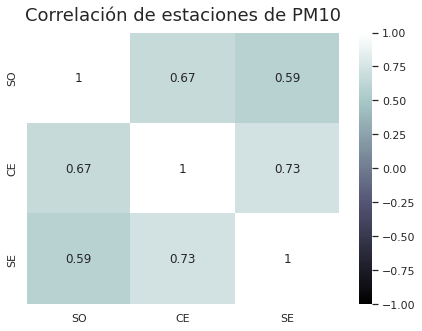

In [ ]:
plt.figure(figsize=(7,5))
heatmap = sns.heatmap(df_pm10.corr(), vmin = -1, vmax = 1, annot = True, cmap='bone')
heatmap.set_title('Correlación de estaciones de PM10', fontdict={'fontsize':18}, pad=12)

Text(0.5, 1.0, 'Correlación de estaciones de PM 2.5')

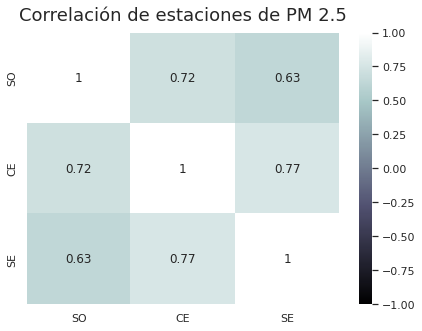

In [ ]:
plt.figure(figsize=(7,5))
heatmap = sns.heatmap(df_pm25.corr(), vmin = -1, vmax = 1, annot = True, cmap='bone')
heatmap.set_title('Correlación de estaciones de PM 2.5', fontdict={'fontsize':18}, pad=12)

## Análisis 

Tanto las normativas de PM10 y PM2.5 de México, como las de la OMS están en intervalos de 24 horas, así que se agruparán las fechas por día, obteniendo la media diaria.

In [ ]:
pm10_mx = 75
pm10_oms = 45
pm25_mx = 45
pm25_oms = 15

In [ ]:
pm10_d = df_pm10.groupby([df_pm10['Fecha'].dt.date]).mean()
pm10_d.reset_index(inplace=True)
pm25_d = df_pm25.groupby([df_pm25['Fecha'].dt.date]).mean()
pm25_d.reset_index(inplace=True)

pm10_d['Fecha'] = pd.to_datetime(pm10_d['Fecha'])
pm25_d['Fecha'] = pd.to_datetime(pm25_d['Fecha'])

### PM10 

#### Anual

In [ ]:
pm10_17 = pm10_d[pm10_d['Fecha'].dt.year == 2017]
pm10_18 = pm10_d[pm10_d['Fecha'].dt.year == 2018]
pm10_19 = pm10_d[pm10_d['Fecha'].dt.year == 2019]
pm10_20 = pm10_d[pm10_d['Fecha'].dt.year == 2020]
pm10_21 = pm10_d[pm10_d['Fecha'].dt.year == 2021]

pm10_anual = [pm10_17, pm10_18, pm10_19, pm10_20, pm10_21]

In [ ]:
dur(pm10_anual)

------------------------------
Año 2017
Cantidad de días con mediciones: 363
------------------------------
Año 2018
Cantidad de días con mediciones: 343
------------------------------
Año 2019
Cantidad de días con mediciones: 352
------------------------------
Año 2020
Cantidad de días con mediciones: 361
------------------------------
Año 2021
Cantidad de días con mediciones: 178
------------------------------


In [ ]:
d_over(pm10_anual, pm10_mx, pm10_oms)

--------------------------------------------------------------
Año: 2017
----------
Días sobre la normativa nacional en estación Suroeste: (202, 11, 150)
Días sobre la normativa nacional en estación Centro: (294, 17, 52)
Días sobre la normativa nacional en estación Sureste: (306, 12, 45)
-------------------------------
Días sobre la normativa de la OMS en estación Suroeste: (54, 12, 297)
Días sobre la normativa de la OMS en estación Centro: (149, 19, 195)
Días sobre la normativa de la OMS en estación Sureste: (142, 19, 202)
--------------------------------------------------------------
Año: 2018
----------
Días sobre la normativa nacional en estación Suroeste: (202, 14, 127)
Días sobre la normativa nacional en estación Centro: (284, 14, 45)
Días sobre la normativa nacional en estación Sureste: (276, 18, 49)
-------------------------------
Días sobre la normativa de la OMS en estación Suroeste: (96, 8, 239)
Días sobre la normativa de la OMS en estación Centro: (162, 14, 167)
Días sobre 

In [ ]:
pm10_sobre = pd.ExcelFile('/content/drive/Shareddrives/Apostoles/Reto/pm10_diassobre.xlsx')
pm10_sobre_mx = pd.read_excel(pm10_sobre, 'Mx')
pm10_sobre_oms = pd.read_excel(pm10_sobre, 'Oms')

In [ ]:
fig = px.line(pm10_sobre_mx, x='Anio', y='DiasSobre', color='Estacion', symbol="Estacion")
fig.update_layout(
    title="Días sobre la norma mexicana de PM10",
    xaxis_title="Año",
    yaxis_title="Días Sobre la Norma",
    legend_title="Estación")
fig.show()

In [ ]:
fig = px.line(pm10_sobre_oms, x='Anio', y='DiasSobre', color='Estacion', symbol="Estacion")
fig.update_layout(
    title="Días sobre la norma de la OMS de PM10",
    xaxis_title="Año",
    yaxis_title="Días Sobre la Norma",
    legend_title="Estación")
fig.show()

#### Mensual

In [ ]:
pm10_m_17 = pm10_17.groupby([pm10_17['Fecha'].dt.month]).mean()
pm10_m_17.reset_index(inplace=True)
pm10_m_17['Anio'] = 2017
pm10_m_18 = pm10_18.groupby([pm10_18['Fecha'].dt.month]).mean()
pm10_m_18.reset_index(inplace=True)
pm10_m_18['Anio'] = 2018
pm10_m_19 = pm10_19.groupby([pm10_19['Fecha'].dt.month]).mean()
pm10_m_19.reset_index(inplace=True)
pm10_m_19['Anio'] = 2019
pm10_m_20 = pm10_20.groupby([pm10_20['Fecha'].dt.month]).mean()
pm10_m_20.reset_index(inplace=True)
pm10_m_20['Anio'] = 2020
pm10_m_21 = pm10_21.groupby([pm10_21['Fecha'].dt.month]).mean()
pm10_m_21.reset_index(inplace=True)
pm10_m_21['Anio'] = 2021

In [ ]:
lista = [pm10_m_17, pm10_m_18, pm10_m_19, pm10_m_20, pm10_m_21]
pm10_m = np.vstack(lista)
pm10_m = pd.DataFrame(pm10_m, columns = ['Mes', 'SO', 'CE', 'SE', 'Anio'])

In [ ]:
fig = px.line(pm10_m, x="Mes", y="SO", color='Anio')
fig.update_layout(
    title="Contaminación Promedio por Mes de PM10 en SO",
    xaxis_title="Mes",
    yaxis_title="Niveles de Contaminación Promedio (μg/m^3)",
    legend_title="Año")
fig.show()

In [ ]:
fig = px.line(pm10_m, x="Mes", y="CE", color='Anio')
fig.update_layout(
    title="Contaminación Promedio por Mes de PM10 en CE",
    xaxis_title="Mes",
    yaxis_title="Niveles de Contaminación Promedio (μg/m^3)",
    legend_title="Año")
fig.show()

In [ ]:
fig = px.line(pm10_m, x="Mes", y="SE", color='Anio')
fig.update_layout(
    title="Contaminación Promedio por Mes de PM10 en SE",
    xaxis_title="Mes",
    yaxis_title="Niveles de Contaminación Promedio (μg/m^3)",
    legend_title="Año")
fig.show()

#### Semanal

0 - Lunes
<br>
1 - Martes
<br>
2 - Miércoles
<br>
3 - Jueves
<br>
4 - Viernes 
<br>
5 - Sábado
<br>
6 - Domingo

In [ ]:
pm10_s_17 = pm10_17.groupby([pm10_17['Fecha'].dt.weekday]).mean()
pm10_s_17.reset_index(inplace=True)
pm10_s_17['Anio'] = 2017
pm10_s_18 = pm10_18.groupby([pm10_18['Fecha'].dt.weekday]).mean()
pm10_s_18.reset_index(inplace=True)
pm10_s_18['Anio'] = 2018
pm10_s_19 = pm10_19.groupby([pm10_19['Fecha'].dt.weekday]).mean()
pm10_s_19.reset_index(inplace=True)
pm10_s_19['Anio'] = 2019
pm10_s_20 = pm10_20.groupby([pm10_20['Fecha'].dt.weekday]).mean()
pm10_s_20.reset_index(inplace=True)
pm10_s_20['Anio'] = 2020
pm10_s_21 = pm10_21.groupby([pm10_21['Fecha'].dt.weekday]).mean()
pm10_s_21.reset_index(inplace=True)
pm10_s_21['Anio'] = 2021

In [ ]:
lista = [pm10_s_17, pm10_s_18, pm10_s_19, pm10_s_20, pm10_s_21]
pm10_s = np.vstack(lista)
pm10_s = pd.DataFrame(pm10_s, columns = ['Dia_semana', 'SO', 'CE', 'SE', 'Anio'])

In [ ]:
fig = px.line(pm10_s, x="Dia_semana", y="SO", color='Anio')
fig.update_layout(
    title="Contaminación Promedio por Días de la Semana de PM10 en SO",
    xaxis_title="Dia de la Semana",
    yaxis_title="Niveles de Contaminación Promedio (μg/m^3)",
    legend_title="Año")
fig.show()

In [ ]:
fig = px.line(pm10_s, x="Dia_semana", y="CE", color='Anio')
fig.update_layout(
    title="Contaminación Promedio por Días de la Semana de PM10 en CE",
    xaxis_title="Dia de la Semana",
    yaxis_title="Niveles de Contaminación Promedio (μg/m^3)",
    legend_title="Año")
fig.show()

In [ ]:
fig = px.line(pm10_s, x="Dia_semana", y="SE", color='Anio')
fig.update_layout(
    title="Contaminación Promedio por Días de la Semana de PM10 en SE",
    xaxis_title="Dia de la Semana",
    yaxis_title="Niveles de Contaminación Promedio (μg/m^3)",
    legend_title="Año")
fig.show()

#### Hora

In [ ]:
pm10_h_17 = df_pm10[df_pm10['Fecha'].dt.year == 2017]
pm10_h_17.drop('parametro', axis = 1)
pm10_h_17 = pm10_h_17.set_index(['Fecha'])
pm10_h_17 = pm10_h_17.groupby(pm10_h_17.index.hour).mean()
pm10_h_17.reset_index(inplace=True)
pm10_h_17['Anio'] = 2017

pm10_h_18 = df_pm10[df_pm10['Fecha'].dt.year == 2018]
pm10_h_18.drop('parametro', axis = 1)
pm10_h_18 = pm10_h_18.set_index(['Fecha'])
pm10_h_18 = pm10_h_18.groupby(pm10_h_18.index.hour).mean()
pm10_h_18.reset_index(inplace=True)
pm10_h_18['Anio'] = 2018

pm10_h_19 = df_pm10[df_pm10['Fecha'].dt.year == 2019]
pm10_h_19.drop('parametro', axis = 1)
pm10_h_19 = pm10_h_19.set_index(['Fecha'])
pm10_h_19 = pm10_h_19.groupby(pm10_h_19.index.hour).mean()
pm10_h_19.reset_index(inplace=True)
pm10_h_19['Anio'] = 2019

pm10_h_20 = df_pm10[df_pm10['Fecha'].dt.year == 2020]
pm10_h_20.drop('parametro', axis = 1)
pm10_h_20 = pm10_h_20.set_index(['Fecha'])
pm10_h_20 = pm10_h_20.groupby(pm10_h_20.index.hour).mean()
pm10_h_20.reset_index(inplace=True)
pm10_h_20['Anio'] = 2020

pm10_h_21 = df_pm10[df_pm10['Fecha'].dt.year == 2021]
pm10_h_21.drop('parametro', axis = 1)
pm10_h_21 = pm10_h_21.set_index(['Fecha'])
pm10_h_21 = pm10_h_21.groupby(pm10_h_21.index.hour).mean()
pm10_h_21.reset_index(inplace=True)
pm10_h_21['Anio'] = 2021


In [ ]:
lista1 = [pm10_h_17, pm10_h_18, pm10_h_19, pm10_h_20, pm10_h_21]
pm10_h = np.vstack(lista1)
pm10_h = pd.DataFrame(pm10_h, columns = ['Hora', 'SO', 'CE', 'SE','Anio'])

In [ ]:
fig = px.line(pm10_h, x="Hora", y="SO", color='Anio')
fig.update_layout(
    title="Contaminación Promedio por Hora de PM10 en SO",
    xaxis_title="Hora",
    yaxis_title="Niveles de Contaminación Promedio (μg/m^3)",
    legend_title="Año")
fig.show()

In [ ]:
fig = px.line(pm10_h, x="Hora", y="CE", color='Anio')
fig.update_layout(
    title="Contaminación Promedio por Hora de PM10 en CE",
    xaxis_title="Hora",
    yaxis_title="Niveles de Contaminación Promedio (μg/m^3)",
    legend_title="Año")
fig.show()

In [ ]:
fig = px.line(pm10_h, x="Hora", y="SE", color='Anio')
fig.update_layout(
    title="Contaminación Promedio por Hora de PM10 en SE",
    xaxis_title="Hora",
    yaxis_title="Niveles de Contaminación Promedio (μg/m^3)",
    legend_title="Año")
fig.show()

 #### Bar Graphs de cumplimiento para SO

In [ ]:
pm10_so_mx=d_over_list(pm10_anual,pm10_mx,'SO')
pm10_so_oms=d_over_list(pm10_anual,pm10_oms,'SO')
regular,buenos,pasado,faltantes=listsForBarGraph(pm10_anual,pm10_so_mx)
bar_plot_text(regular, buenos, pasado, faltantes,'Estacion SO PM10 según las normativas MX')

20 20 20


In [ ]:
pm10_so_oms=d_over_list(pm10_anual,pm10_oms,'SO')
regular,buenos,pasado,faltantes=listsForBarGraph(pm10_anual,pm10_so_oms)
bar_plot_text(regular, buenos, pasado, faltantes,'Estacion SO PM10 según las normativas OMS')

20 20 20


 #### Bar Graphs de cumplimiento para CE

In [ ]:
pm10_so_mx=d_over_list(pm10_anual,pm10_mx,'CE')
regular,buenos,pasado,faltantes=listsForBarGraph(pm10_anual,pm10_so_mx)
bar_plot_text(regular, buenos, pasado, faltantes,'Estacion CE PM10 según las normativas MX')

20 20 20


In [ ]:
pm10_so_oms=d_over_list(pm10_anual,pm10_oms,'CE')
regular,buenos,pasado,faltantes=listsForBarGraph(pm10_anual,pm10_so_oms)
bar_plot_text(regular, buenos, pasado, faltantes,'Estacion CE PM10 según las OMS')

20 20 20


 #### Bar Graphs de cumplimiento para SE

In [ ]:
pm10_so_mx=d_over_list(pm10_anual,pm10_mx,'SE')
regular,buenos,pasado,faltantes=listsForBarGraph(pm10_anual,pm10_so_mx)
bar_plot_text(regular, buenos, pasado, faltantes,'Estacion SE PM10 según las normativas MX')

20 20 20


In [ ]:
pm10_so_oms=d_over_list(pm10_anual,pm10_oms,'SE')
regular,buenos,pasado,faltantes=listsForBarGraph(pm10_anual,pm10_so_oms)
bar_plot_text(regular, buenos, pasado, faltantes,'Estacion SE PM10 según las OMS')

20 20 20


### PM2.5

#### Anual

In [ ]:
pm25_17 = pm25_d[pm25_d['Fecha'].dt.year == 2017]
pm25_18 = pm25_d[pm25_d['Fecha'].dt.year == 2018]
pm25_19 = pm25_d[pm25_d['Fecha'].dt.year == 2019]
pm25_20 = pm25_d[pm25_d['Fecha'].dt.year == 2020]
pm25_21 = pm25_d[pm25_d['Fecha'].dt.year == 2021]

pm25_anual = [pm25_17, pm25_18, pm25_19, pm25_20, pm25_21]

In [ ]:
dur(pm25_anual)

------------------------------
Año 2017
Cantidad de días con mediciones: 217
------------------------------
Año 2018
Cantidad de días con mediciones: 144
------------------------------
Año 2019
Cantidad de días con mediciones: 316
------------------------------
Año 2020
Cantidad de días con mediciones: 339
------------------------------
Año 2021
Cantidad de días con mediciones: 162
------------------------------


In [ ]:
d_over(pm25_anual, pm25_mx, pm25_oms)

--------------------------------------------------------------
Año: 2017
----------
Días sobre la normativa nacional en estación Suroeste: (214, 1, 2)
Días sobre la normativa nacional en estación Centro: (214, 1, 2)
Días sobre la normativa nacional en estación Sureste: (216, 1, 0)
-------------------------------
Días sobre la normativa de la OMS en estación Suroeste: (63, 8, 146)
Días sobre la normativa de la OMS en estación Centro: (48, 14, 155)
Días sobre la normativa de la OMS en estación Sureste: (82, 12, 123)
--------------------------------------------------------------
Año: 2018
----------
Días sobre la normativa nacional en estación Suroeste: (123, 4, 17)
Días sobre la normativa nacional en estación Centro: (136, 0, 8)
Días sobre la normativa nacional en estación Sureste: (143, 1, 0)
-------------------------------
Días sobre la normativa de la OMS en estación Suroeste: (39, 8, 97)
Días sobre la normativa de la OMS en estación Centro: (48, 8, 88)
Días sobre la normativa de la O

In [ ]:
pm25_sobre = pd.ExcelFile('/content/drive/Shareddrives/Apostoles/Reto/pm25_diassobre.xlsx')
pm25_sobre_mx = pd.read_excel(pm25_sobre, 'Mx')
pm25_sobre_oms = pd.read_excel(pm25_sobre, 'Oms')

In [ ]:
fig = px.line(pm25_sobre_mx, x='Anio', y='DiasSobre', color='Estacion', symbol="Estacion")
fig.update_layout(
    title="Días sobre la norma mexicana de PM2.5",
    xaxis_title="Año",
    yaxis_title="Días Sobre la Norma",
    legend_title="Estación")
fig.show()

In [ ]:
fig = px.line(pm25_sobre_oms, x='Anio', y='DiasSobre', color='Estacion', symbol="Estacion")
fig.update_xaxes(tickformat="%Y")
fig.update_layout(
    title="Días sobre la norma de la OMS de PM 2.5",
    xaxis_title="Año",
    yaxis_title="Días Sobre la Norma",
    legend_title="Estación")
fig.show()

#### Mensual

In [ ]:
pm25_m_17 = pm25_17.groupby([pm25_17['Fecha'].dt.month]).mean()
pm25_m_17.reset_index(inplace=True)
pm25_m_17['Anio'] = 2017
pm25_m_18 = pm25_18.groupby([pm25_18['Fecha'].dt.month]).mean()
pm25_m_18.reset_index(inplace=True)
pm25_m_18['Anio'] = 2018
pm25_m_19 = pm25_19.groupby([pm25_19['Fecha'].dt.month]).mean()
pm25_m_19.reset_index(inplace=True)
pm25_m_19['Anio'] = 2019
pm25_m_20 = pm25_20.groupby([pm25_20['Fecha'].dt.month]).mean()
pm25_m_20.reset_index(inplace=True)
pm25_m_20['Anio'] = 2020
pm25_m_21 = pm25_21.groupby([pm25_21['Fecha'].dt.month]).mean()
pm25_m_21.reset_index(inplace=True)
pm25_m_21['Anio'] = 2021

In [ ]:
lista = [pm25_m_17, pm25_m_18, pm25_m_19, pm25_m_20, pm25_m_21]
pm25_m = np.vstack(lista)
pm25_m = pd.DataFrame(pm25_m, columns = ['Mes', 'SO', 'CE', 'SE', 'Anio'])

In [ ]:
fig = px.line(pm25_m, x="Mes", y="SO", color='Anio')
fig.update_layout(
    title="Contaminación Promedio por Mes de PM2.5 en SO",
    xaxis_title="Mes",
    yaxis_title="Niveles de Contaminación Promedio (μg/m^3)",
    legend_title="Año")
fig.show()

In [ ]:
fig = px.line(pm25_m, x="Mes", y="CE", color='Anio')
fig.update_layout(
    title="Contaminación Promedio por Mes de PM2.5 en CE",
    xaxis_title="Mes",
    yaxis_title="Niveles de Contaminación Promedio (μg/m^3)",
    legend_title="Año")
fig.show()

In [ ]:
fig = px.line(pm25_m, x="Mes", y="SE", color='Anio')
fig.update_layout(
    title="Contaminación Promedio por Mes de PM2.5 en SE",
    xaxis_title="Mes",
    yaxis_title="Niveles de Contaminación Promedio (μg/m^3)",
    legend_title="Año")
fig.show()

#### Semanal

In [ ]:
pm25_s_17 = pm25_17.groupby([pm25_17['Fecha'].dt.weekday]).mean()
pm25_s_17.reset_index(inplace=True)
pm25_s_17['Anio'] = 2017
pm25_s_18 = pm25_18.groupby([pm25_18['Fecha'].dt.weekday]).mean()
pm25_s_18.reset_index(inplace=True)
pm25_s_18['Anio'] = 2018
pm25_s_19 = pm25_19.groupby([pm25_19['Fecha'].dt.weekday]).mean()
pm25_s_19.reset_index(inplace=True)
pm25_s_19['Anio'] = 2019
pm25_s_20 = pm25_20.groupby([pm25_20['Fecha'].dt.weekday]).mean()
pm25_s_20.reset_index(inplace=True)
pm25_s_20['Anio'] = 2020
pm25_s_21 = pm25_21.groupby([pm25_21['Fecha'].dt.weekday]).mean()
pm25_s_21.reset_index(inplace=True)
pm25_s_21['Anio'] = 2021

In [ ]:
lista = [pm25_s_17, pm25_s_18, pm25_s_19, pm25_s_20, pm25_s_21]
pm25_s = np.vstack(lista)
pm25_s = pd.DataFrame(pm25_s, columns = ['Dia_semana', 'SO', 'CE', 'SE', 'Anio'])

In [ ]:
fig = px.line(pm25_s, x="Dia_semana", y="SO", color='Anio')
fig.update_layout(
    title="Contaminación Promedio por Día de la Semana de PM2.5 en SO",
    xaxis_title="Día de la Semana",
    yaxis_title="Niveles de Contaminación Promedio (μg/m^3)",
    legend_title="Año")
fig.show()

In [ ]:
fig = px.line(pm25_s, x="Dia_semana", y="CE", color='Anio')
fig.update_layout(
    title="Contaminación Promedio por Día de la Semana de PM2.5 en CE",
    xaxis_title="Día de la Semana",
    yaxis_title="Niveles de Contaminación Promedio (μg/m^3)",
    legend_title="Año")
fig.show()

In [ ]:
fig = px.line(pm25_s, x="Dia_semana", y="SE", color='Anio')
fig.update_layout(
    title="Contaminación Promedio por Día de la Semana de PM2.5 en SE",
    xaxis_title="Día de la Semana",
    yaxis_title="Niveles de Contaminación Promedio (μg/m^3)",
    legend_title="Año")
fig.show()

#### Hora

In [ ]:
pm25_h_17 = df_pm25[df_pm25['Fecha'].dt.year == 2017]
pm25_h_17.drop('parametro', axis = 1)
pm25_h_17 = pm25_h_17.set_index(['Fecha'])
pm25_h_17 = pm25_h_17.groupby(pm25_h_17.index.hour).mean()
pm25_h_17.reset_index(inplace=True)
pm25_h_17['Anio'] = 2017

pm25_h_18 = df_pm25[df_pm25['Fecha'].dt.year == 2018]
pm25_h_18.drop('parametro', axis = 1)
pm25_h_18 = pm25_h_18.set_index(['Fecha'])
pm25_h_18 = pm25_h_18.groupby(pm25_h_18.index.hour).mean()
pm25_h_18.reset_index(inplace=True)
pm25_h_18['Anio'] = 2018

pm25_h_19 = df_pm25[df_pm25['Fecha'].dt.year == 2019]
pm25_h_19.drop('parametro', axis = 1)
pm25_h_19 = pm25_h_19.set_index(['Fecha'])
pm25_h_19 = pm25_h_19.groupby(pm25_h_19.index.hour).mean()
pm25_h_19.reset_index(inplace=True)
pm25_h_19['Anio'] = 2019

pm25_h_20 = df_pm25[df_pm25['Fecha'].dt.year == 2020]
pm25_h_20.drop('parametro', axis = 1)
pm25_h_20 = pm25_h_20.set_index(['Fecha'])
pm25_h_20 = pm25_h_20.groupby(pm25_h_20.index.hour).mean()
pm25_h_20.reset_index(inplace=True)
pm25_h_20['Anio'] = 2020

pm25_h_21 = df_pm25[df_pm25['Fecha'].dt.year == 2021]
pm25_h_21.drop('parametro', axis = 1)
pm25_h_21 = pm25_h_21.set_index(['Fecha'])
pm25_h_21 = pm25_h_21.groupby(pm25_h_21.index.hour).mean()
pm25_h_21.reset_index(inplace=True)
pm25_h_21['Anio'] = 2021

In [ ]:
lista2 = [pm25_h_17, pm25_h_18, pm25_h_19, pm25_h_20, pm25_h_21]
pm25_h = np.vstack(lista2)
pm25_h = pd.DataFrame(pm25_h, columns = ['Hora', 'SO', 'CE', 'SE','Anio'])

In [ ]:
fig = px.line(pm25_h, x="Hora", y="SO", color='Anio')
fig.update_layout(
    title="Contaminación Promedio por Hora de PM2.5 en SO",
    xaxis_title="Hora",
    yaxis_title="Niveles de Contaminación Promedio (μg/m^3)",
    legend_title="Año")
fig.show()

In [ ]:
fig = px.line(pm25_h, x="Hora", y="CE", color='Anio')
fig.update_layout(
    title="Contaminación Promedio por Hora de PM2.5 en CE",
    xaxis_title="Hora",
    yaxis_title="Niveles de Contaminación Promedio (μg/m^3)",
    legend_title="Año")
fig.show()

In [ ]:
fig = px.line(pm25_h, x="Hora", y="SE", color='Anio')
fig.update_layout(
    title="Contaminación Promedio por Hora de PM2.5 en SE",
    xaxis_title="Hora",
    yaxis_title="Niveles de Contaminación Promedio (μg/m^3)",
    legend_title="Año")
fig.show()

 #### Bar Graphs de cumplimiento para SO

In [ ]:
pm25_so_mx=d_over_list(pm25_anual,pm25_mx,'SO')
regular,buenos,pasado,faltantes=listsForBarGraph(pm25_anual,pm25_so_mx)
bar_plot_text(regular, buenos, pasado, faltantes,'Estacion SE PM25 según las normativas MX')

20 20 20


In [ ]:
pm25_so_oms=d_over_list(pm25_anual,pm25_mx,'SO')
regular,buenos,pasado,faltantes=listsForBarGraph(pm25_anual,pm25_so_oms)
bar_plot_text(regular, buenos, pasado, faltantes,'Estacion SE PM25 según las OMS')

20 20 20


 #### Bar Graphs de cumplimiento para CE

In [ ]:
pm25_so_mx=d_over_list(pm25_anual,pm25_mx,'CE')
regular,buenos,pasado,faltantes=listsForBarGraph(pm25_anual,pm25_so_mx)
bar_plot_text(regular, buenos, pasado, faltantes,'Estacion CE PM25 según las normativas MX')

20 20 20


In [ ]:
pm25_so_oms=d_over_list(pm25_anual,pm25_mx,'CE')
regular,buenos,pasado,faltantes=listsForBarGraph(pm25_anual,pm25_so_oms)
bar_plot_text(regular, buenos, pasado, faltantes,'Estacion CE PM25 según las normativas MX')

20 20 20


 #### Bar Graphs de cumplimiento para SE

In [ ]:
pm25_so_mx=d_over_list(pm25_anual,pm25_mx,'SE')
regular,buenos,pasado,faltantes=listsForBarGraph(pm25_anual,pm25_so_mx)
bar_plot_text(regular, buenos, pasado, faltantes,'Estacion SE PM25 según las normativas MX')

20 20 20


In [ ]:
pm25_so_oms=d_over_list(pm25_anual,pm25_mx,'SE')
regular,buenos,pasado,faltantes=listsForBarGraph(pm25_anual,pm25_so_oms)
bar_plot_text(regular, buenos, pasado, faltantes,'Estacion SE PM25 según las normativas OMS')

20 20 20
